### CIC is looking for you to make suggestions about potential “rules” that they could implement with Jornaya data to positively impact their lead-buying strategy. For example, these are some good questions and points to start with:
- Based on the data available, is there a certain type of lead that CIC should not bother purchasing?
- Are there consumers that CIC should prioritize purchase and trying to contact? 
- What are the characteristics of the leads that CIC should not and should prioritize purchasing, and how can they implement rules using Jornaya data to distinguish these leads?
- How much of a difference does having Jornaya data available make vs. not having it available?
- Remember we are aiming to prove Jornaya’s data can have a meaningful and valuable impact to CIC, so showing numbers for how these rules can affect CIC will increase the strength of your story.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import wrangle

In [2]:
df = pd.read_csv('clean_CIC.csv').set_index('token')

In [3]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


___

## Make more dummies to explore with

### Lead cost

In [4]:
# dummy lead cost feature
dummy_df =  pd.get_dummies(df['lead_cost'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['lead_costs_25', 'lead_costs_50', 
                    'lead_costs_75', 'lead_costs_100']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

### Competitors

In [5]:
# dummy competitors feature
dummy_df =  pd.get_dummies(df['competitors'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['competitors_0', 'competitors_1', 
                    'competitors_2', 'competitors_3']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

___

## Split the data

In [6]:
train, validate, test = wrangle.split_CIC(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test) 
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

## Target Variable Initial Explore

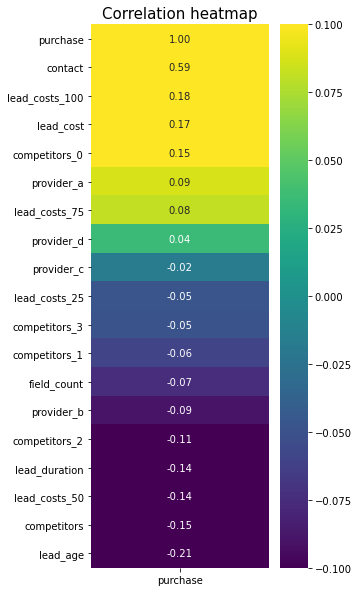

In [7]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['purchase'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.1, 
            vmax = 0.1, cmap = 'viridis')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

### Takeaways:
- Only 6.77% of leads purchased with CIC is converted into a sell.
- Form the correlation heatmap:
    - lead_age with a neg corr of -0.21

### Questions Arised:
- How can we optimize sales?
- How does lead age affect sales?

___

### Lead Age
- Number of seconds between when a consumer submitted an online form to when CIC received the lead

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


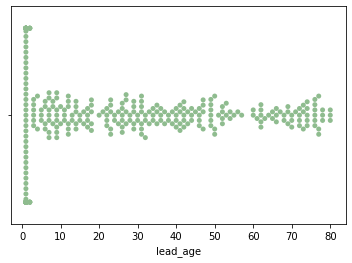

In [8]:
sns.swarmplot(data=train, x='lead_age', color='darkseagreen', edgecolor='black')
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


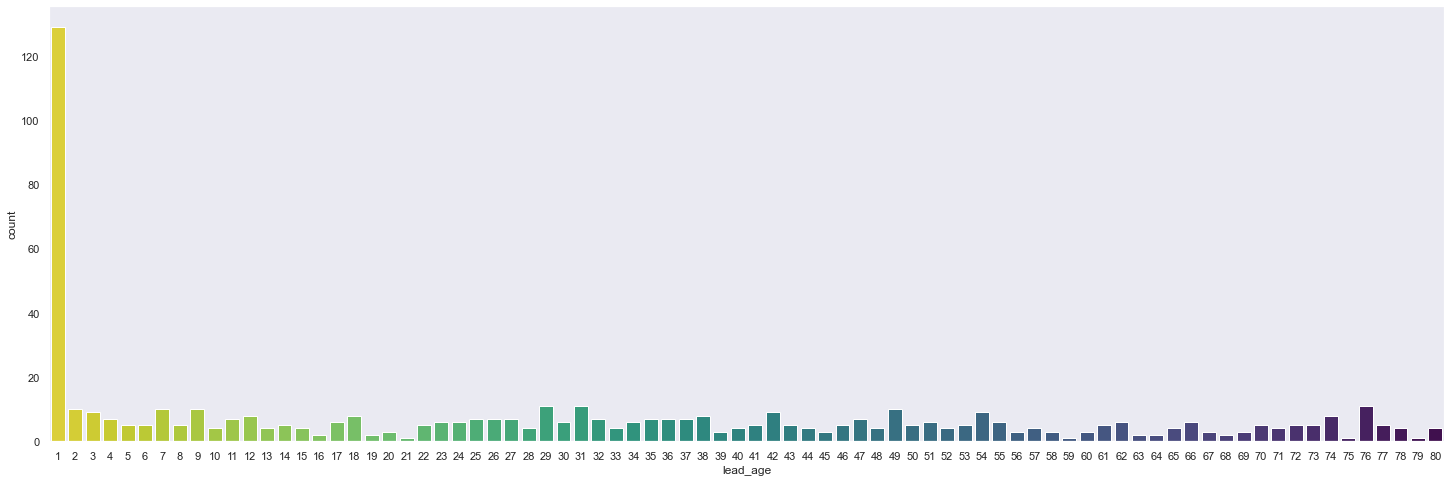

In [9]:
plt.figure(figsize=(25,8))
sns.set(style="dark")
sns.countplot(df['lead_age'], palette='viridis_r')
plt.show()

### Takeaways:
- It mostly only takes 1 second to send to CIC.

___

## Answer Questions Using Bivariate and Multivariate

5. Is there a correlation between lead_duration and provider?
    - seconds, between when a consumer submitted an online form to when CIC received the lead

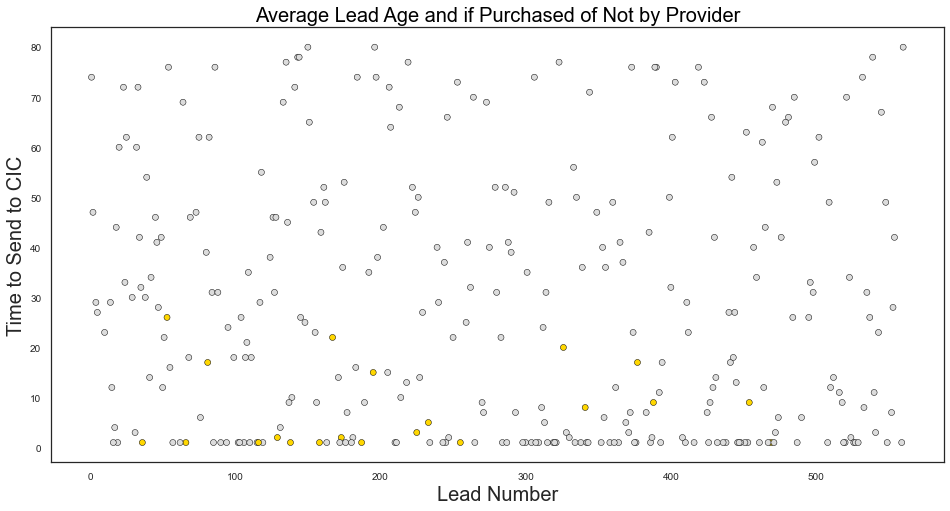

In [10]:
plt.figure(figsize=(16,8))
sns.set(style="white")
clrs = ['gainsboro', 'gold']
sns.scatterplot(data=train, x=train.index, y='lead_age', hue='purchase', palette=clrs, 
                edgecolor='black', legend=None)
plt.title("Average Lead Age and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Lead Number", size=20)
plt.ylabel('Time to Send to CIC', size=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.savefig("age_scatter", transparent=True)

In [11]:
df[(df['purchase'] == 1) & (df['lead_age'])].mean()

lead_cost          69.444444
contact             1.000000
purchase            1.000000
lead_age            6.000000
lead_duration     497.555556
field_count         9.555556
competitors         0.166667
provider_a          0.222222
provider_b          0.055556
provider_c          0.388889
provider_d          0.333333
lead_costs_25       0.222222
lead_costs_50       0.111111
lead_costs_75       0.333333
lead_costs_100      0.333333
competitors_0       0.833333
competitors_1       0.166667
competitors_2       0.000000
competitors_3       0.000000
dtype: float64

([<matplotlib.axis.XTick at 0x7fee7be0a5e0>,
 [Text(0, 0, 'Not Purchased'), Text(1, 0, 'Purchased')])

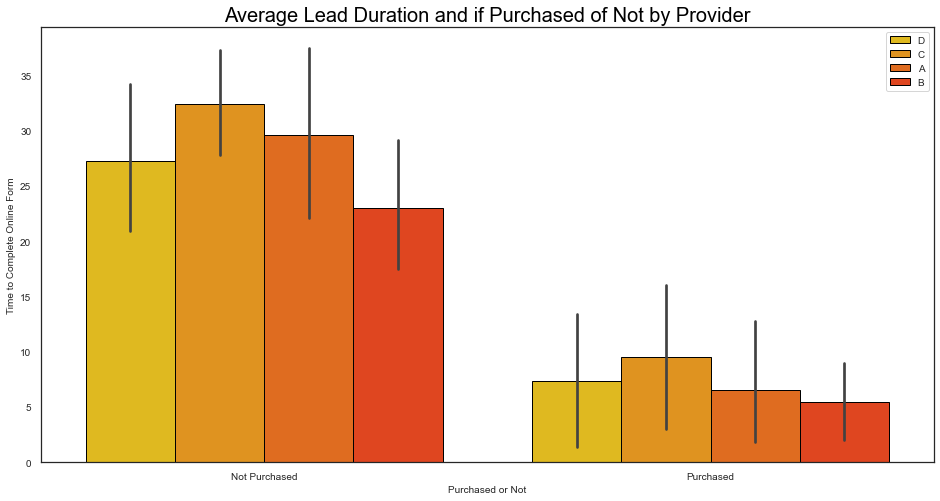

In [12]:
# set figure size
plt.figure(figsize=(16,8))
# make plot
sns.barplot(data=train, x='purchase', y='lead_age', hue='provider', palette='autumn_r', edgecolor='black')
# set title
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
# set x label
plt.xlabel("Purchased or Not", size=10)
# set y label
plt.ylabel('Time to Complete Online Form', size=10)
# change x tick size
plt.xticks(fontsize=10) 
# change y tick size
plt.yticks(fontsize=10) 
# cplace legend
plt.legend(loc='upper right', prop={'size': 10})
# adjust x ticks
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


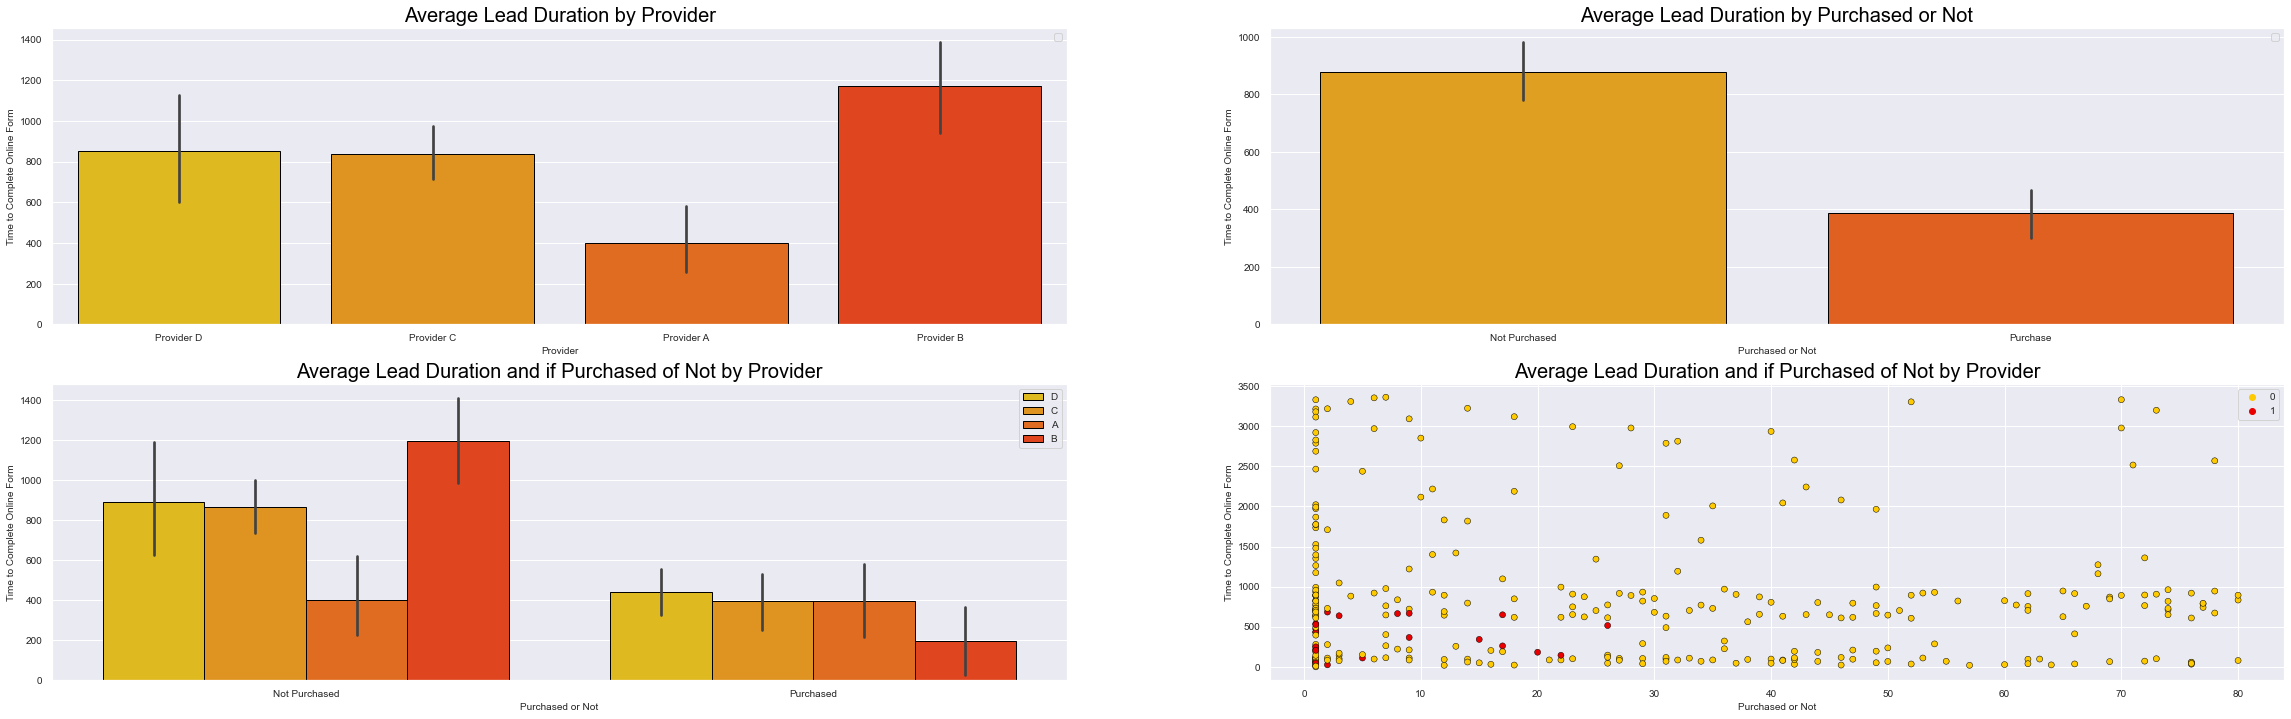

In [13]:
plt.subplots(2,2, figsize=(40,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.barplot(data=train, x='provider', y='lead_duration', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration by Provider", size=20, color='black')
plt.xlabel("Provider", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1, 2, 3], ['Provider D', 'Provider C', 'Provider A', 'Provider B'])

plt.subplot(2,2,2)
sns.barplot(data=train, x='purchase', y='lead_duration', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration by Purchased or Not", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchase'])

plt.subplot(2,2,3)
sns.barplot(data=train, x='purchase', y='lead_duration', hue='provider', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,4)
sns.scatterplot(data=train, x='lead_age', y='lead_duration', hue='purchase', palette='hot_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

### Takeaways:
- Provider B send leads that take the longest average time to complete the online form
- Provider A sends leads with the shortest average time 
- Leads purchased tend to have a shorter average duration than those leads not sold.
- Provider A's lead duration does not differ much between purchased and not purchased.
- Provider B's leads tht dont sell take about 12 hundred seconds to be completed but the ones that do sell tend to only take 200 seconds on average to be completed.
- Purchases tend to have much lower age and duration.

___

6. How much money are we loosing in this 92.23% of leads?

In [14]:
not_bought = df[df['purchase'] != 1]
money_lost = not_bought.groupby('lead_age').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

money_lost.count().head(1)

provider    80
dtype: int64

### Takeaways:
- Money Lost:
    - 158 * 25 = 3,950
    - 208 * 50 = 10,400
    - 100 * 75 = 7,500
    - 61 * 100 = 6,100
- Total money lost = $27,950

___

# Statistical tests

___

### Purchase & provider(s)
Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.
Using Anova test
- I am doing this because one of the categorical variables has more than 2 categories

### Look at Contigency Table

### Purchase & lead_cost
Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.

Using Anova test
- I am doing this because one of the categorical variables has more than 2 categories

### Look at contingency table

In [15]:
contigency = pd.crosstab(df['purchase'], df['lead_cost'])
contigency

lead_cost,25,50,75,100
purchase,,,,
0,158,208,100,61
1,7,2,10,8


In [16]:
contigency_pct = pd.crosstab(df['purchase'], df['lead_cost'], normalize='index')
contigency_pct

lead_cost,25,50,75,100
purchase,,,,
0,0.299810,0.394687,0.189753,0.115750
1,0.259259,0.074074,0.370370,0.296296


### Purchase & lead age
Using pearsonr
- doing this to see if there is a correlatation between purchand and lead age
- doing this because there is one categorical and one continuous variable

In [17]:
null_hypothesis = "There is no correlation between number of purchases and lead age."
alt_hypothesis = "There is a correlation between number of purchases and lead age."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.lead_age

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the lead age is: \n', corr)
print(f' The P value between purchase and lead age is: \n', p)

 The correlation between purchase and the lead age is: 
 -0.20753570203656613
 The P value between purchase and lead age is: 
 0.00023376393530933126


In [18]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Reject null hypothesis: 
'There is no correlation between number of purchases and lead age.'
 
We now move forward with our alternative hypothesis: 
'There is a correlation between number of purchases and lead age.'
 
This is a weak negative correlation.


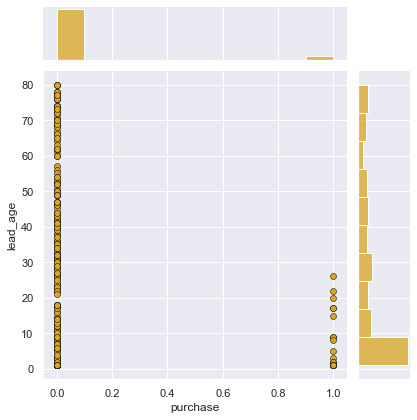

In [19]:
sns.jointplot(data=train, x='purchase', y='lead_age', color='goldenrod', edgecolor='black')

___
# Lead Duration

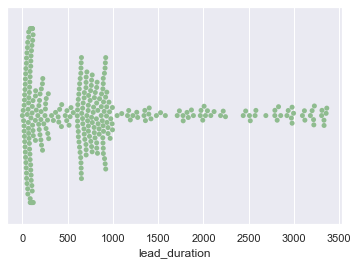

In [43]:
sns.swarmplot(data=train, x='lead_duration', color='darkseagreen', edgecolor='black')
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


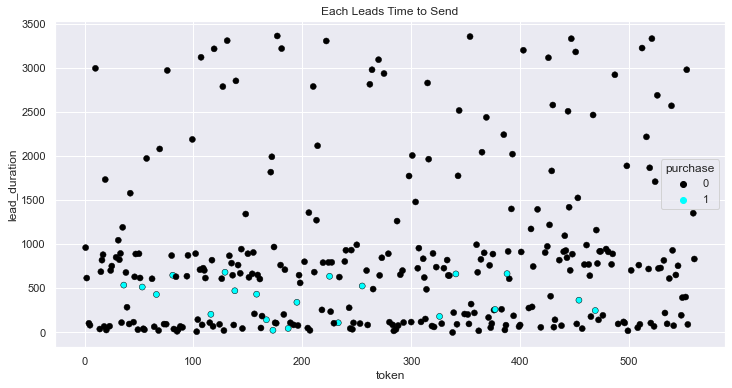

In [44]:
plt.figure(figsize=(12,6))
# create color palette
colors = ['black','cyan']
sns.scatterplot(train.index, train.lead_duration, hue=train.purchase, 
                palette=colors, edgecolor='black')
# set title
plt.title('Each Leads Time to Send')
plt.show()

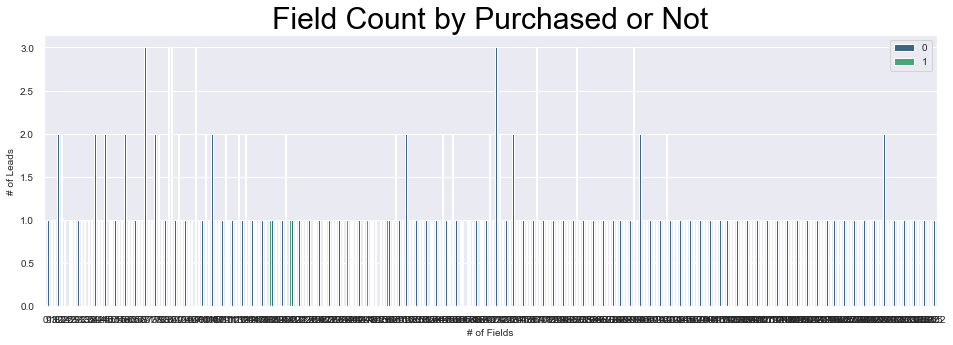

In [45]:
plt.figure(figsize=(16,5))
sns.countplot(data=train, x='lead_duration', hue='purchase', palette='viridis')
plt.title("Field Count by Purchased or Not", size=30, color='black')
plt.xlabel("# of Fields", size=10)
plt.ylabel('# of Leads', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

No handles with labels found to put in legend.
No handles with labels found to put in legend.


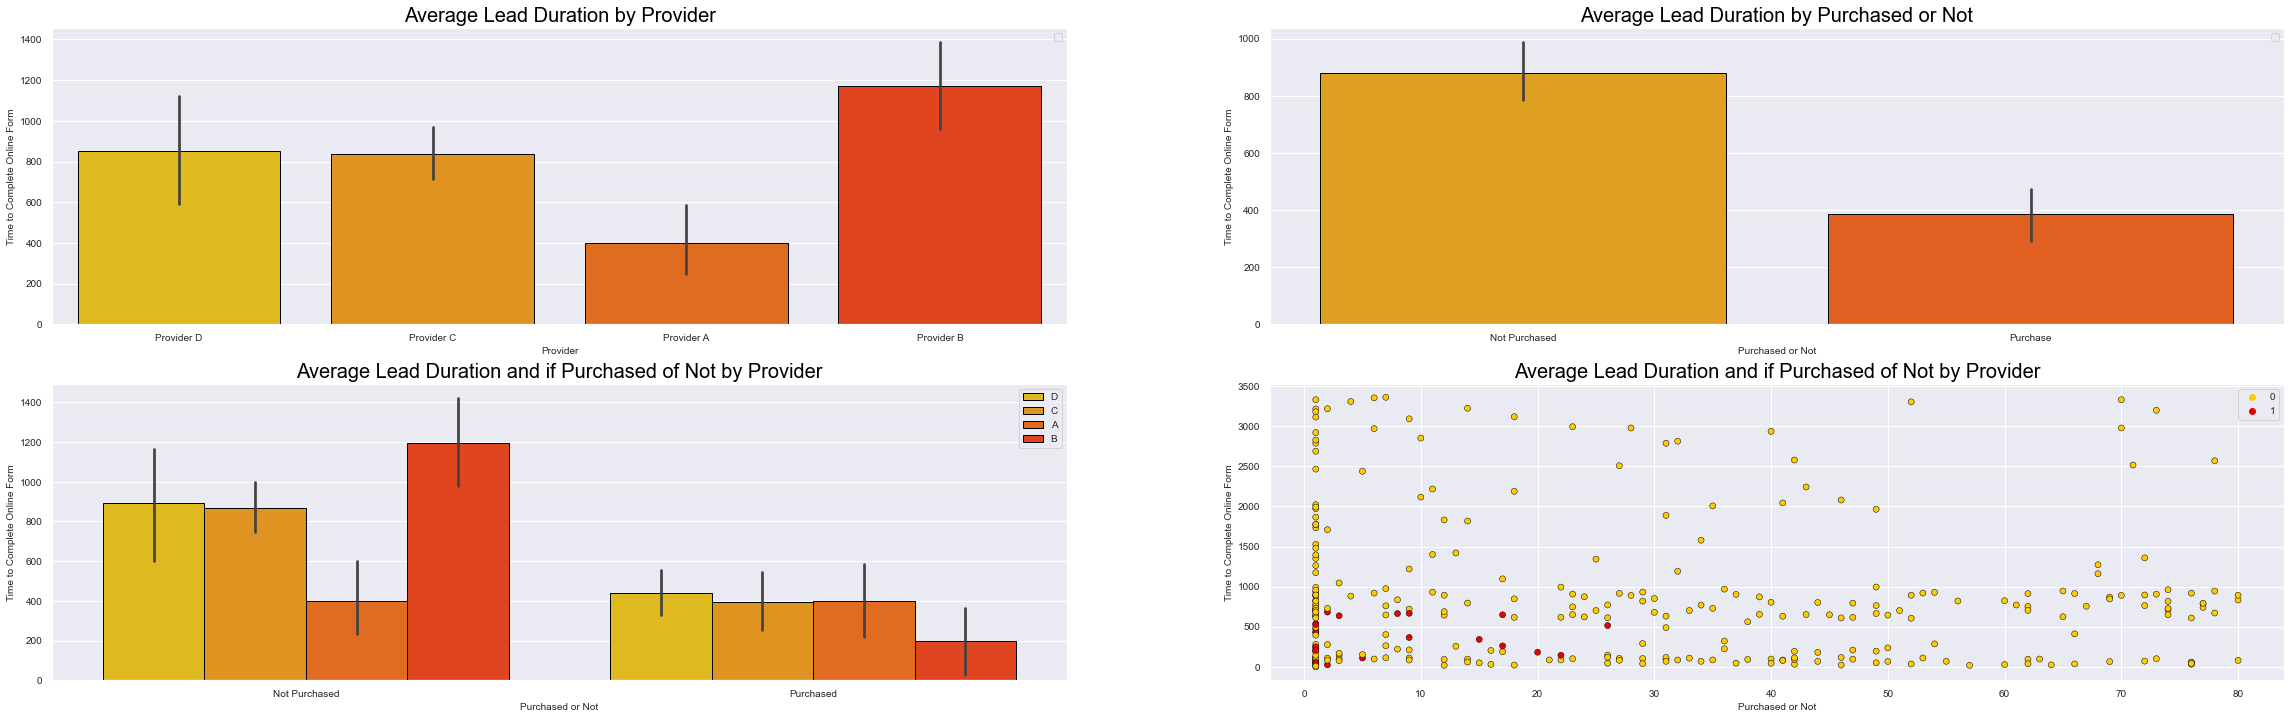

In [46]:
plt.subplots(2,2, figsize=(40,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.barplot(data=train, x='provider', y='lead_duration', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration by Provider", size=20, color='black')
plt.xlabel("Provider", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1, 2, 3], ['Provider D', 'Provider C', 'Provider A', 'Provider B'])

plt.subplot(2,2,2)
sns.barplot(data=train, x='purchase', y='lead_duration', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration by Purchased or Not", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchase'])

plt.subplot(2,2,3)
sns.barplot(data=train, x='purchase', y='lead_duration', hue='provider', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,4)
sns.scatterplot(data=train, x='lead_age', y='lead_duration', hue='purchase', palette='hot_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

### Takeaways:
- Provider B send leads that take the longest average time to complete the online form
- Provider A sends leads with the shortest average time 
- Leads purchased tend to have a shorter average duration than those leads not sold.
- Provider A's lead duration does not differ much between purchased and not purchased.
- Provider B's leads tht dont sell take about 12 hundred seconds to be completed but the ones that do sell tend to only take 200 seconds on average to be completed.
- Purchases tend to have much lower age and duration.

In [47]:
null_hypothesis = "There is no correlation between number of purchases and lead duration."
alt_hypothesis = "There is a correlation between number of purchases and lead duration."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.lead_duration

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the lead duration is: \n', corr)
print(f' The P value between purchase and lead duration is: \n', p)

 The correlation between purchase and the lead duration is: 
 -0.14007162265185477
 The P value between purchase and lead duration is: 
 0.01357058611706759


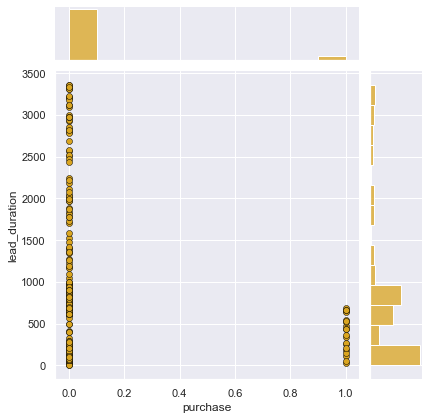

In [48]:
sns.jointplot(data=train, x='purchase', y='lead_duration', color='goldenrod', edgecolor='black')

___
## If we remove all leads above 30 second lead age and above 1000 second lead duration what happens?

In [31]:
(df.purchase == 1).sum()

27

In [32]:
new_df = df[df.lead_age < 30]

In [33]:
(new_df.purchase == 1).sum()

26

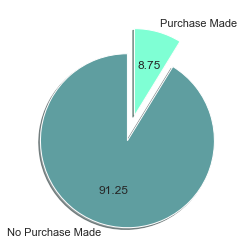

In [23]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(new_df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [40]:
newest_df = new_df[new_df.lead_duration < 1000]

In [41]:
(newest_df.purchase == 1).sum()

25

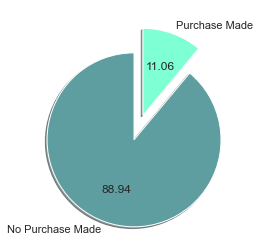

In [42]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(newest_df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

## Takeaways

- If we dont purchase leads that have a lead age higher than 30 or a lead duration of over 1000 seconds then we can increase our consumer purchase from 6.77% up to 11.06
    - although this doesnt seem like a big difference it really is. because with a purchase of 11.06% equatees to:
        - 554 x .1106 = 61.27.24 sales instead of 554 x 0.0677 = 37.5058 sales